In [2]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats

import os, sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)

from project.data.make_steps import make_data_dict, step_detection

In [3]:
data_dict1 = make_data_dict('00010100_s001_t000')
data_dict2 = make_data_dict('00010102_s001_t000')
steps1 = step_detection(data_dict1, 'FP1')
steps2 = step_detection(data_dict2, 'FP1')
step1 = steps1[0]
step2 = steps2
data1 = data_dict1['FP1'][step1[0]:step1[1] - 10000]
data2 = data_dict2['FP1'][step2[0]:step2[1]]
print(data1, data2)

[ 3.84556184e-05  3.67771529e-05  3.40305730e-05 ... -2.28846657e-05
 -2.33424290e-05 -2.05958491e-05] [7.06516381e-05 7.58396223e-05 7.69077367e-05 ... 3.50000000e-09
 3.50000000e-09 3.50000000e-09]


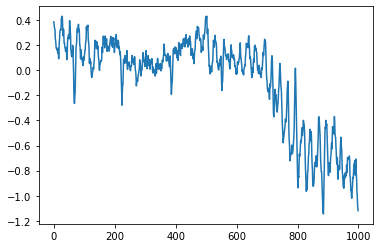

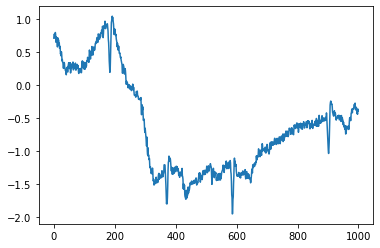

[ 3.84556184e-01  3.67771529e-01  3.40305730e-01  3.29624586e-01
  3.21995197e-01  2.50278945e-01  2.33494290e-01  2.04502613e-01
  1.75510937e-01  1.78562692e-01  1.61778038e-01  1.61778038e-01
  1.63303915e-01  1.34312239e-01  1.73985059e-01  1.46519260e-01
  9.00617850e-02  1.66355671e-01  2.19761391e-01  2.47227189e-01
  3.08262298e-01  3.12839931e-01  3.25046953e-01  3.17417564e-01
  3.43357485e-01  4.10496105e-01  3.96763205e-01  4.28806637e-01
  4.24229004e-01  3.44883363e-01  2.91477643e-01  2.71641233e-01
  3.25046953e-01  2.67063600e-01  2.15183757e-01  2.15183757e-01
  1.86192081e-01  1.80088570e-01  1.63303915e-01  1.48045138e-01
  1.69407426e-01  1.81614448e-01  1.35838116e-01  8.39582742e-02
  1.22105217e-01  2.18235513e-01  2.59434211e-01  2.57908333e-01
  2.80796499e-01  2.77744744e-01  2.48753067e-01  3.09788176e-01
  3.93711450e-01  3.54038629e-01  3.25046953e-01  2.74692988e-01
  1.67881548e-01  1.48045138e-01  1.14475828e-01  1.06846440e-01
  1.19053462e-01  1.19053

In [26]:
#data11 = (data1 * np.power(10, 4))[::10000]
#data22 = (data2 * np.power(10, 4))[::10000]
data11 = (data1[:1000])*np.power(10,4)
data22 = (data2[:1000])*np.power(10,4)
plt.plot(data11)
plt.show()
plt.plot(data22)
plt.show()
print(data11, data22)

In [5]:
import math
X = np.arange(len(data11))
Y = np.array([data22[i] for i in range(len(data11))])

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X.reshape(-1,1), Y)

SVR()

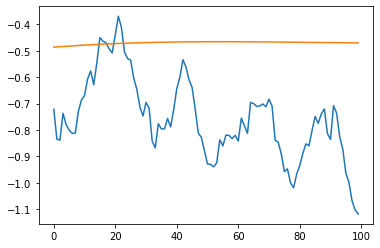

In [30]:
preds = np.array([i for i in range(len(data11)-100, len(data11))]).reshape(-1,1)
regressor.predict(preds)
plt.plot(data11[-100:])
plt.plot(regressor.predict(preds))
plt.show()

In [8]:
from hmmlearn import hmm
hmm_model = hmm.GaussianHMM(n_components=30, covariance_type="full", n_iter=100)
hmm_model.fit(Y.reshape(-1,1))
hmm_preds = hmm_model.predict(Y.reshape(-1,1))
print(hmm_preds)

[23 23 23 23 23 23 23 15 15 15 15 15 15 15 15 15 15  6  6  6  6  6 14 14
 14 14 14 28 28 28 28  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 28 28 28 28 28 28 28 28 14 14 14 14
 14 14 14 14 14 14 14 14 14 14  6  6  6  6  6  6  6 15 15 15 15 15 15 15
 15 15 23 23 15 15 15 15 23 23 23 23 23 23 23 23 23 23 23 23  3  3  3  3
  3  3  3  3  3  3  3  3  3  3 23 15 15  6 28  1  1  1 28 15 23  3  3  3
  3  3  3  3  3 23 23 23 23 23 23 23 23 15 15 15  6  6  6  6  6  6  6 14
 14 14 14 14 14 28 28 28  1  1  1  1  1  1  1  1  1  1  1  1  1 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 21
 21 21 21 21 21  5  5  5  5  2 27 27 27 27  8  8  8  8  8 26 26 26  4  4
  4  4  4 22 22 22 22 19 10 10 10 10 10 10  0  0  0

In [9]:
last_state = hmm_preds[-1]
curr = -1
factor = len(data11)
count=0
while not (hmm_preds[curr] == last_state and hmm_preds[curr-1] != last_state):
    factor//=2
    if factor<1:factor=1
    if hmm_preds[curr]==last_state: curr-=factor
    else: curr+=factor
    count+=1
    if count>20: break
print(hmm_preds[curr], curr)

21 -24


/Users/ishan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


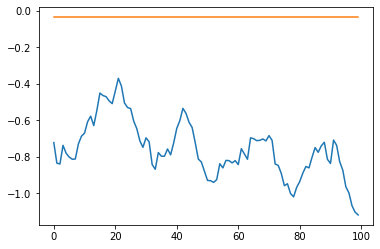

In [85]:
from sklearn.metrics import mean_squared_error
hmm_regressor = SVR(kernel = 'rbf')
hmm_regressor.fit(X.reshape(-1,1)[curr:], Y[curr:])

hmm2_preds = np.array([i for i in range(len(data11)-100, len(data11))]).reshape(-1,1)
hmm_regressor.predict(hmm2_preds)
plt.plot(data11[-100:])
plt.plot(regressor.predict(hmm2_preds))
plt.show()

In [162]:
window=20
num_states=3
num_samples=30
num_preds=1

def NRMSD(y_true, y_pred):
    MSE = mean_squared_error(y_true,y_pred)
    RMSD = np.power(MSE, 0.5)
    diff = np.max(y_true) - np.min(y_true)
    if diff != 0: return RMSD / diff
    else: return RMSD

def get_last_state(hmm_preds):
    last_state = hmm_preds[len(hmm_preds)-1]
    curr = len(hmm_preds)-1
    factor = len(hmm_preds)
    count=0
    while not (hmm_preds[curr] == last_state and hmm_preds[curr-1] != last_state):
        factor//=2
        if factor<1:factor=1
        if hmm_preds[curr]==last_state: curr-=factor
        else: curr+=factor
        count+=1
        if count>20: break
    return curr, hmm_preds[curr]

eval_data1 = (data1)*np.power(10,4)
x = np.arange(len(eval_data1)).reshape(-1,1)
y = np.array([eval_data1[i] for i in range(len(eval_data1))]).reshape(-1,1)
samples = np.random.randint(0, len(eval_data1)-window, num_samples)

preds = []
vals = []
mape_arr = []
for sample in samples:
    hmm_model = hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=40)
    hmm_model.fit(y[sample:sample+window])
    hmm_preds = hmm_model.predict(y[sample:sample+window])
    last_state_idx,_ = get_last_state(hmm_preds)
    sample+=last_state_idx
    
    regressor = SVR(kernel = 'rbf',epsilon=.001)
    regressor.fit(x[sample:sample+window-num_preds], y[sample:sample+window-num_preds].ravel())
    pred_vals = np.array([i for i in range(sample+window-num_preds, sample+window)]).reshape(-1,1)
    pred = regressor.predict(pred_vals)
    
    vals.append(y[sample+window-num_preds:sample+window].ravel())
    preds.append(pred)
    
    mape = MAPE(y[sample+window-num_preds:sample+window].ravel(),pred)
    mape_arr.append(mape)

nrmsd = NRMSD(vals, preds)
print(nrmsd)
    
#print(mape_arr)
#print(np.average(mape_arr))
    
    

0.014757671432663334


In [147]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100